In [43]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Exercício 1 - 
Considere a base de dados disponível em https://www.openml.org/d/1460 (dica: no sklearn, você pode usar o fetch_openml para baixar a base). Usando o StratifiedKFold (fixe a semente em 42) com 10 folds, dentre os algoritmos de classificação Discriminante Linear, Discriminante Quadrático, Naive Bayes e Regressão Logística, o algoritmo com maior taxa de acurácia média no conjunto de teste é o *Resposta*
, e o algoritmo com maior AUC no conjunto de teste é o *Resposta*

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.scorer import roc_auc_scorer,accuracy_scorer
from sklearn.metrics import f1_score, roc_auc_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

In [3]:
dados = fetch_openml(data_id=1460)
X,y = dados['data'],dados['target']
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

In [4]:
results = pd.DataFrame()
models = {
    "LDA":LinearDiscriminantAnalysis(),
    "QDA":QuadraticDiscriminantAnalysis(),
    "LogisticRegression":LogisticRegression(solver='lbfgs'),
    "GaussianNB":GaussianNB(),
}
for model_name,model in models.items():
    print(model_name, "-----------")
    result = cross_validate(model,X,y,scoring=['roc_auc','accuracy'],cv=cv)
    result = pd.DataFrame(result)
    result['model_name'] = model_name
    results = results.append(result)
results

LDA -----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

QDA -----------
LogisticRegression -----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

GaussianNB -----------


,fit_time,score_time,test_roc_auc,test_accuracy,model_name
0,0.020977,0.004993,0.553087,0.561205,LDA
1,0.011964,0.003991,0.566797,0.538606,LDA
2,0.011967,0.004988,0.568661,0.587571,LDA
3,0.012014,0.005938,0.552600,0.566855,LDA
4,0.012965,0.004032,0.534462,0.575472,LDA
5,0.012922,0.002992,0.519584,0.569811,LDA
6,0.011924,0.003990,0.555228,0.563327,LDA
7,0.012965,0.003027,0.497052,0.550095,LDA
8,0.011978,0.003944,0.537050,0.534972,LDA
9,0.012961,0.002955,0.581065,0.563327,LDA


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(results.groupby("model_name")[['test_roc_auc','test_accuracy']].mean(),annot=True)
plt.show()
print("best accuracy : QDA")
print("best roc_auc: NaiveBayes")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 640x480 with 2 Axes>

best accuracy : QDA
best roc_auc: NaiveBayes


# Exercício 2 
Considere a base de dados disponível em neste link: [https://raw.githubusercontent.com/amueller/ml-workshop-2-of-4/master/notebooks/data/bike_day_raw.csv]. Essa base de dados contém informações sobre o aluguel de bicicletas pela plataforma citybike. A coluna cnt é a quantidade de bicicletas alugadas por hora, o qual queremos predizer com base nos outros atributos. Crie um modelo de regressão linear usando o modelo LinearRegression da biblioteca sklearn. A seguir, normalize os coeficientes da regressão pelo desvio padrão de cada atributo. Após essa normalização, o atributo que tem o maior coeficiente é o [XXXXXXX]
, e o atributo com o menor coeficiente é o [XXXXXXX]

In [6]:
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/amueller/ml-workshop-2-of-4/master/notebooks/data/bike_day_raw.csv")
X,y = df.drop("cnt",axis=1),df['cnt']

In [9]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

min :  hum
max :  atemp


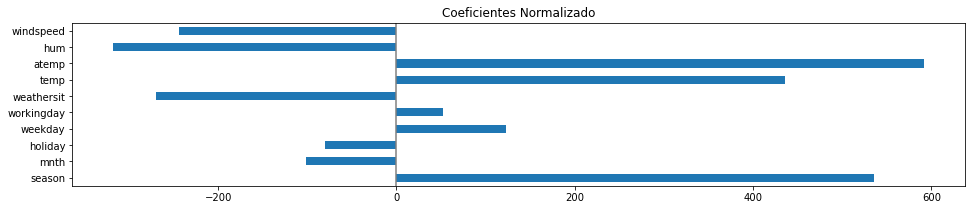

In [10]:
feat_stats = pd.DataFrame(model.coef_,index= X.columns,columns=['Coeficientes'])
feat_stats['std'] = X.std(axis=0)
feat_stats['Coeficientes Normalizados'] = feat_stats['Coeficientes']*feat_stats['std']
feat_stats['Coeficientes Normalizados'].plot(kind='barh', figsize=(16, 3))
plt.title('Coeficientes Normalizado')
print("min : ",feat_stats['Coeficientes Normalizados'].idxmin())
print("max : ",feat_stats['Coeficientes Normalizados'].idxmax())
plt.axvline(x=0, color='.5')
plt.show()

# 3 

In [31]:
dados = fetch_openml(data_id=44)
X,y = dados['data'],dados['target']

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
kNNdict = {}
for i in range(1,16):
    kNNdict[i] = KNeighborsClassifier(n_neighbors=i)

In [34]:
from sklearn.model_selection import validation_curve
from sklearn.metrics.scorer import roc_auc_scorer
import numpy as np 

In [41]:
val = validation_curve(KNeighborsClassifier(),X,y,param_name='n_neighbors',cv=5,param_range=range(1,16),scoring=roc_auc_scorer)
np.mean(val[1],axis=1).argmax()+1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


6

# 4
---
Considere a base de dados disponível em neste link. Essa base de dados contém informações sobre o aluguel de bicicletas pela plataforma citybike. A coluna cnt é a quantidade de bicicletas alugadas por hora, o qual queremos predizer com base nos outros atributos. Crie um pipeline usando PolynomialFeatures e a regressão Ridge. Considere o seguinte grid de parâmetros:

alphas = np.logspace(-3, 3, 7)
degree = list(range(1, 5))
param_grid = dict(regression__alpha=alphas, polynomial_features__degree=degree)

e a função de scoring baseada no mean_squared_error (como visto no notebook da aula). Usando o GridSearchCV com 5 folds, os melhores parâmetros encontrados foram de regression__alpha Resposta
 e polynomial_features__degree Resposta
.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/amueller/ml-workshop-2-of-4/master/notebooks/data/bike_day_raw.csv")
X,y = df.drop("cnt",axis=1),df['cnt']

In [49]:
alphas = np.logspace(-3, 3, 7)
degree = list(range(1, 5))
param_grid = dict(regression__alpha=alphas, polynomial_features__degree=degree)

mse = make_scorer(mean_squared_error, greater_is_better=False)

model = Pipeline([('polynomial_features',PolynomialFeatures()),('regression',Ridge())])
grid = GridSearchCV(model,param_grid=param_grid,scoring=mse,cv=KFold(5))

In [50]:
grid.fit(X,y)
grid.best_params_

{'polynomial_features__degree': 2, 'regression__alpha': 0.01}